# Univariate Regression


In this notebook we're going to build several univariate models
based on the advertising dataset.

We will identify the best model using R-squared, and the metrics related to the coefficients

we will also look at the residuals vs fitted values plot.

So let's import the necessary packages and load the dataset into a dataframe



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/advertising.csv')

df.shape

(200, 4)

The dataset is composed of 200 samples. 

Sales is the outcome and TV, Radio and Newspaper are the predictors

In [2]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Distributions

Let's examine more closely these variables
by plotting the pairwise distribution with seaborn


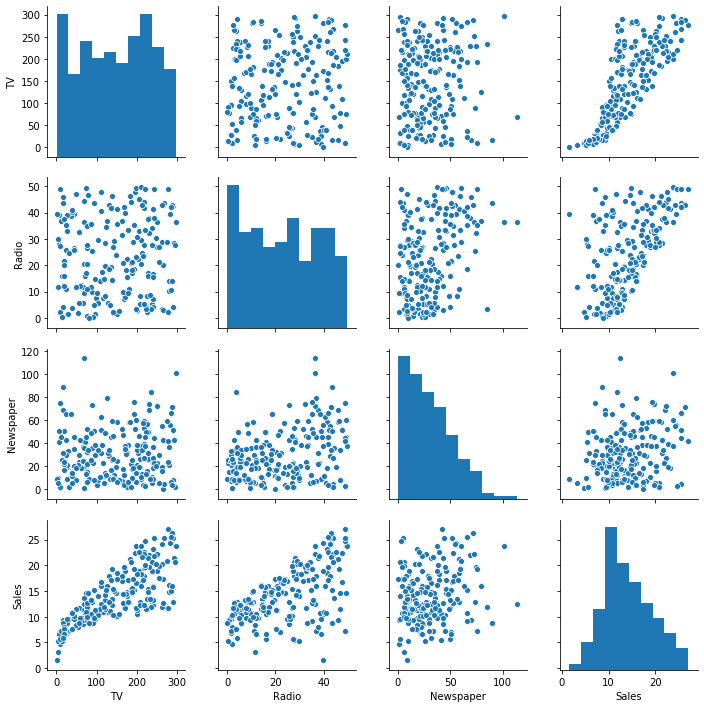

In [4]:
sns.pairplot(df)

We can see that distributions of TV and Radio are mostly uniform
or flat with some peaks

Sales is roughly Normally distributed

And Newspaper is neither

These scatterplots show that
the relation between:

* Sales and TV

and

* Sales and Radio

is roughly linear.

This is not the case for Sales and Newspaper.



## Correlation

The correlation of Sales with the predictors is given by the ```corr()``` function


In [5]:
df.corr()['Sales']

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

We see that TV is the predictor most correlated with Sales

So let's first build the Sales ~ TV model

We can define the regression model with a simple formula as a string


In [6]:
M = 'Sales ~ TV'

and input that model in the ols() function of the statsmodel API

In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm


We can build the model and then fit it

In [8]:
model = smf.ols('Sales ~ TV', data = df)
result = model.fit()


or we can simple chain the 2 steps together
and get the result of the linear regression in 1 line


In [9]:
result = smf.ols('Sales ~ TV', data = df).fit()

And then we apply the summary() method to the 'result' object

In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        15:03:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we're going to focus on

- r-squared

In [11]:
result.rsquared


0.611875050850071

- the coefficients

In [12]:
result.params

Intercept    7.032594
TV           0.047537
dtype: float64

- and the p-values associedt with the coefficients

In [13]:
result.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

We would like to compare that model Sales ~ TV
to the 2 other univariate regression models

* Sales ~ Radio
* Sales ~ Newspaper


We can add the formulas of the 3 models into a list and then loop over that list


In [14]:

formulas = ['Sales ~ TV', 'Sales ~ Radio', 'Sales ~ Newspaper' ]
for formula in formulas:
    result = smf.ols(formula, data = df).fit()
    print("{} \tR^2: {:.2f}".format(formula, result.rsquared))




Sales ~ TV 	R^2: 0.61
Sales ~ Radio 	R^2: 0.33
Sales ~ Newspaper 	R^2: 0.05


We see from these results that in terms of r-squared, the model 

* *Sales vs TV*  is better than the model *Sales ~ Radio* 

* and *Sales ~ Radio* is better than *Sales ~ Newspaper*


In fact the Newspaper budget explains only 5% of the variance of the Sales.

Let's now look at the  p-values for the respective coefficients


In [15]:
formulas = ['Sales ~ TV', 'Sales ~ Radio', 'Sales ~ Newspaper' ]
for formula in formulas:
    result = smf.ols(formula, data = df).fit()
    print("\n-- {}  \n{}".format(formula, result.pvalues))



-- Sales ~ TV  
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

-- Sales ~ Radio  
Intercept    3.561071e-39
Radio        4.354966e-19
dtype: float64

-- Sales ~ Newspaper  
Intercept    4.713507e-49
Newspaper    1.148196e-03
dtype: float64


The p-values all indicate that these univariate models are reliable.

However we cannot compare the different coefficients of the different predictors
since the predictors are not scaled.

So let's transform the predictors
so that they are centered with standard deviation 1.


In [16]:
df['TV'] = (df.TV - np.mean(df.TV) ) / np.std(df.TV)
df['Radio'] = (df.Radio - np.mean(df.Radio) ) / np.std(df.Radio)
df['Newspaper'] = (df.Newspaper - np.mean(df.Newspaper) ) / np.std(df.Newspaper)


And rerun the same regressions, this time looking at the coefficients

In [17]:
formulas = ['Sales ~ TV', 'Sales ~ Radio', 'Sales ~ Newspaper' ]
for formula in formulas:
    result = smf.ols(formula, data = df).fit()
    print("\n-- {}  \n{}".format(formula, result.params))



-- Sales ~ TV  
Intercept    14.022500
TV            4.071006
dtype: float64

-- Sales ~ Radio  
Intercept    14.022500
Radio         2.998891
dtype: float64

-- Sales ~ Newspaper  
Intercept    14.022500
Newspaper     1.188159
dtype: float64


Since the predictors are all scaled
we can interpret the coefficients
as measures of the correlation
between the outcome and each predictor.

And we come to the same conclusion that we had with the correlation matrix
that TV is the predictor most correlated  to Sales
followed by Radio and then Newspaper.


## residuals vs fitted values

We can also look at the residuals vs fitted values
plots for the 3 models
This type of plot is a good diagnostic tool



With a good model you would not be able to infer any pattern from the plot.


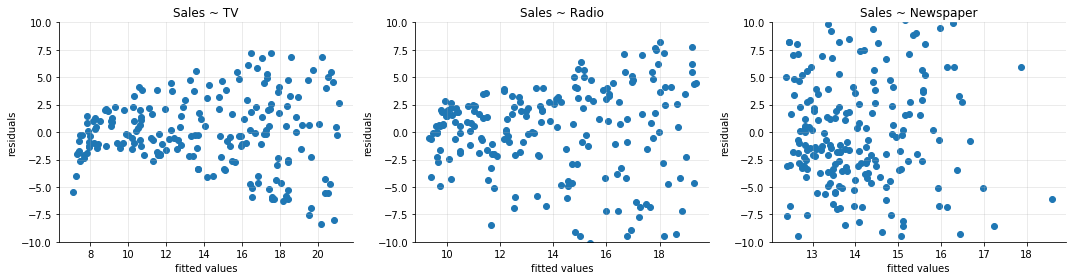

In [18]:
formulas = ['Sales ~ TV', 'Sales ~ Radio', 'Sales ~ Newspaper' ]

fig, ax = plt.subplots(1,3, figsize = (15,4), sharey = True)

for n in range(3):
    result = smf.ols(formulas[n], data = df).fit()
    plt.subplot(1,3,n+1)
    plt.scatter(result.fittedvalues, result.resid)
    plt.title(formulas[n])
    plt.xlabel('fitted values')
    plt.ylabel('residuals')
    plt.ylim(-10, 10)
    sns.despine()
    plt.grid(alpha = 0.3)
plt.tight_layout()




The first 2 plots show that the mean of residuals is constant


However the spread of the residuals is increasing as the fitted values change

This is a symptom called **heteroskedasticity**
that we will see in details in a next chapter.

The 3rd plot that corresponds to the Sales vs Newspaper model
shows some diffusion but the spread and mean  of the residuals seems to be relatively constant.



